In [86]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
import sys
repo_dir = '/home/labs/amit/noamsh/repos/MM_2023'
sys.path.append(repo_dir)

In [88]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

## data loading

### abundance + label

In [89]:
data_dir_path = Path("/home/labs/amit/noamsh/data/CAR_T")
cell_abundance_dataset_path  = Path(data_dir_path, "cell_type_abundance_by_sample_group_normalized.csv")
cell_abundance_dataset = pd.read_csv(cell_abundance_dataset_path)
cell_abundance_dataset = cell_abundance_dataset.set_index('sample_id')

y = cell_abundance_dataset['response_3m']
cell_abandace = cell_abundance_dataset.drop(columns=['response_3m', 'LDH_prior_tx'])
cell_abandace.index = cell_abandace.index.rename("patient")

print(cell_abandace.shape)
print(cell_abandace.columns)

cell_abandace.head()

(42, 18)
Index(['B', 'CD4.CM', 'CD4.EM', 'CD4.Naive', 'CD8.CM', 'CD8.EM', 'CD8.naive',
       'Cycling', 'MAIT', 'NK.bright', 'NK.dim', 'Tregs', 'CD14 Mono',
       'CD16 Mono', 'DCs', 'Inter Mono', 'pDC', 'B_category'],
      dtype='object')


,B,CD4.CM,CD4.EM,CD4.Naive,CD8.CM,CD8.EM,CD8.naive,Cycling,MAIT,NK.bright,NK.dim,Tregs,CD14 Mono,CD16 Mono,DCs,Inter Mono,pDC,B_category
patient,,,,,,,,,,,,,,,,,,
GIL_01,0.00000,0.03413,0.06143,0.19027,0.11604,0.35239,0.01109,0.06997,0.02133,0.00939,0.11348,0.02048,0.80223,0.04625,0.03668,0.10207,0.01276,B_unknown
GIL_02,0.00053,0.01163,0.03594,0.17336,0.10994,0.40275,0.03066,0.02854,0.00951,0.01374,0.16490,0.01903,0.75158,0.16737,0.01263,0.06632,0.00211,B_unknown
GIL_03,0.00201,0.04025,0.04441,0.13393,0.19570,0.39695,0.01457,0.02776,0.01319,0.00694,0.07703,0.04927,0.68304,0.14933,0.03468,0.13102,0.00193,B_unknown
GIL_04,0.01039,0.08419,0.05155,0.22852,0.06014,0.32646,0.01890,0.06014,0.00344,0.01890,0.07216,0.07560,0.49444,0.36111,0.02222,0.12222,0.00000,B_unknown
GIL_05,0.00358,0.01944,0.01080,0.10151,0.09287,0.25702,0.00432,0.02592,0.02808,0.08423,0.36933,0.00648,0.60175,0.21765,0.03032,0.14960,0.00067,B_unknown


In [90]:
# cell_abandace.drop(columns=["B_category"]).sum(axis=1)

### long term labels

In [91]:
LTR_data_path = Path(data_dir_path, "cell_type_abundance_by_sample_group_normalized.LTR.csv")
LRT_data = pd.read_csv(LTR_data_path)
LRT_data = LRT_data[["sample_id", "response_3m", "LTR"]].rename(columns={"sample_id": "patient"}).set_index("patient")

In [92]:
y_ltr = LRT_data["LTR"]
# y_ltr

In [93]:
pd.testing.assert_series_equal(LRT_data["response_3m"], y, check_names=False)

### baseline

In [94]:
baseline_data_path = Path(data_dir_path, "patients_baseline_predictions.csv")
baseline_data = pd.read_csv(baseline_data_path)
baseline_data = baseline_data.rename(columns={'Unnamed: 0': 'sample_id'})
baseline_data = baseline_data.set_index('sample_id')

baseline_data.index = baseline_data.index.rename("patient")

print(baseline_data.shape)
print(baseline_data.columns)
baseline_data.head()

(42, 7)
Index(['NR', 'R', 'predicted', 'TRUE', 'n_trials', 'predicted_proba',
       'prediction_scores'],
      dtype='object')


,NR,R,predicted,TRUE,n_trials,predicted_proba,prediction_scores
patient,,,,,,,
GIL_01,20,10,NR,NR,30,0.333333,-0.466667
GIL_02,17,11,NR,NR,28,0.392857,-0.323810
GIL_03,12,12,NR,NR,24,0.500000,-0.066667
GIL_04,3,17,R,NR,20,0.850000,0.773333
GIL_05,6,14,R,NR,20,0.700000,0.413333


In [95]:
pd.testing.assert_series_equal(baseline_data["TRUE"], y, check_names=False)

### patient metadata

In [96]:
# md = pd.read_excel(Path(data_dir_path, "2024_03_04 CART Clinical metadata analysed only V2.xlsx")).dropna(subset="ID")
# md["sample_name"].apply(lambda x: x.split('/')[0])

In [97]:
metadata_path = Path(data_dir_path, "2024_03_04 CART Clinical metadata analysed only V2.xlsx")
patient_metadata = pd.read_excel(metadata_path).dropna(subset="sample_name")
patient_metadata["Product {GIL: 0, NOV:1}"] = patient_metadata["Product"].map({"GIL": 0, "NOV":1})
patient_metadata["Sex {M: 0, F:1}"] = patient_metadata["Sex"].map({"M": 0, "F":1})
patient_metadata["sample_name"] = patient_metadata["sample_name"].apply(lambda x: x.split('/')[0])

# patient_metadata.columns

In [98]:
patient_map_path = Path(data_dir_path, "sample_names_ids.csv")
patient_map = pd.read_csv(patient_map_path)
patient_map.head()

,Unnamed: 0,sample_name,sample_id
0,1,Axi-01,GIL_01
1,2,Axi-02,GIL_02
2,3,Axi-03,GIL_03
3,4,Axi-04,GIL_04
4,5,Axi-05,GIL_05


In [99]:
patient_metadata = patient_metadata.merge(patient_map, on="sample_name", how="inner", validate="1:1")

In [100]:
# "Sex {M: 0, F:1}", "Pick_Ferritin"

patient_metadata = patient_metadata[["sample_id",'Day_7_Expansion (CAR T/ml blood)',  "Age", "Product {GIL: 0, NOV:1}"]]
patient_metadata = patient_metadata.set_index("sample_id")
patient_metadata.index = patient_metadata.index.rename("patient")

In [101]:
print(patient_metadata.shape)
print(patient_metadata.columns)
patient_metadata.head()

(43, 3)
Index(['Day_7_Expansion (CAR T/ml blood)', 'Age', 'Product {GIL: 0, NOV:1}'], dtype='object')


,Day_7_Expansion (CAR T/ml blood),Age,"Product {GIL: 0, NOV:1}"
patient,,,
GIL_01,14.7,73.17,0
GIL_02,136.0,47.44,0
GIL_03,47.0,71.62,0
GIL_04,NaN,70.16,0
GIL_05,3.2,72.82,0


### gene pathways

In [102]:
mye_pathways_path = Path(data_dir_path, "Myeloid_zscore_top10_padj_pathways.csv")
mye_pathways = pd.read_csv(mye_pathways_path)

print(mye_pathways.shape)
print(mye_pathways.columns)
mye_pathways.head()

(414, 7)
Index(['orig.ident', 'cell_type', 'cell_type_response', 'response_3m',
       'patient', 'zscore', 'cleaned_pathways'],
      dtype='object')


,orig.ident,cell_type,cell_type_response,response_3m,patient,zscore,cleaned_pathways
0,NR,CD16 Mono,CD16 Mono_NR,NR,GIL-01,0.090858,HALLMARK_APICAL_JUNCTION
1,NR,CD16 Mono,CD16 Mono_NR,NR,GIL-02,-0.046542,HALLMARK_APICAL_JUNCTION
2,NR,CD16 Mono,CD16 Mono_NR,NR,GIL-03,-0.059306,HALLMARK_APICAL_JUNCTION
3,NR,CD16 Mono,CD16 Mono_NR,NR,GIL-04,-0.013229,HALLMARK_APICAL_JUNCTION
4,NR,CD16 Mono,CD16 Mono_NR,NR,GIL-05,-0.010807,HALLMARK_APICAL_JUNCTION


In [103]:
mye_pathways['cleaned_pathways-cell_type'] = mye_pathways['cleaned_pathways'] + "-" + mye_pathways['cell_type'] 
mye_pathways_zscores = mye_pathways[['patient', 'zscore', 'cleaned_pathways-cell_type']].groupby(['patient', 'cleaned_pathways-cell_type'])["zscore"].sum().unstack(level=-1)
print(mye_pathways_zscores.shape)
print(mye_pathways_zscores.columns)
mye_pathways_zscores.head()
# mye_pathways_zscores

(42, 10)
Index(['HALLMARK_APICAL_JUNCTION-CD16 Mono', 'HALLMARK_APOPTOSIS-CD16 Mono',
       'HALLMARK_CHOLESTEROL_HOMEOSTASIS-CD16 Mono',
       'HALLMARK_INFLAMMATORY_RESPONSE-CD14 Mono',
       'HALLMARK_INFLAMMATORY_RESPONSE-CD16 Mono',
       'HALLMARK_INFLAMMATORY_RESPONSE-DCs', 'HALLMARK_P53_PATHWAY-DCs',
       'HALLMARK_TNFA_SIGNALING_VIA_NFKB-CD14 Mono',
       'HALLMARK_TNFA_SIGNALING_VIA_NFKB-CD16 Mono',
       'HALLMARK_TNFA_SIGNALING_VIA_NFKB-DCs'],
      dtype='object', name='cleaned_pathways-cell_type')


cleaned_pathways-cell_type,HALLMARK_APICAL_JUNCTION-CD16 Mono,HALLMARK_APOPTOSIS-CD16 Mono,HALLMARK_CHOLESTEROL_HOMEOSTASIS-CD16 Mono,HALLMARK_INFLAMMATORY_RESPONSE-CD14 Mono,HALLMARK_INFLAMMATORY_RESPONSE-CD16 Mono,HALLMARK_INFLAMMATORY_RESPONSE-DCs,HALLMARK_P53_PATHWAY-DCs,HALLMARK_TNFA_SIGNALING_VIA_NFKB-CD14 Mono,HALLMARK_TNFA_SIGNALING_VIA_NFKB-CD16 Mono,HALLMARK_TNFA_SIGNALING_VIA_NFKB-DCs
patient,,,,,,,,,,
GIL-01,0.090858,0.142722,0.103711,-0.026402,0.125739,-0.079013,0.040826,-0.001839,0.035825,-0.061448
GIL-02,-0.046542,0.016285,0.003678,-0.054138,0.034415,-0.163298,0.056375,-0.014066,0.009606,-0.120022
GIL-03,-0.059306,0.036100,-0.014916,-0.126769,-0.016796,-0.179905,0.005903,-0.068230,-0.001888,-0.073733
GIL-04,-0.013229,0.042234,0.017455,0.044129,0.053433,0.152858,0.241357,0.059288,0.025582,0.225406
GIL-05,-0.010807,0.004165,-0.009597,-0.072766,0.008753,-0.049080,0.004847,-0.043784,-0.046632,-0.002140


### merge data

In [104]:
patient_col = "patient"

cell_abandace.index = cell_abandace.index.astype("string").str.replace("-","_")
mye_pathways_zscores.index = mye_pathways_zscores.index.astype("string").str.replace("-","_")
patient_metadata.index = patient_metadata.index.astype("string").str.replace("-","_")

In [105]:
print("abandace - mye: ", set(cell_abandace.index).difference(set(mye_pathways_zscores.index)))
print("mye - abandace: ", set(mye_pathways_zscores.index).difference(set(cell_abandace.index)))
###
print("metadate - mye: ", set(patient_metadata.index).difference(set(mye_pathways_zscores.index)))
print("mye - metadate: ", set(mye_pathways_zscores.index).difference(set(patient_metadata.index)))
####
print("metadata - abandace: ", set(patient_metadata.index).difference(set(cell_abandace.index)))
print("abandace - metadata: ", set(cell_abandace.index).difference(set(patient_metadata.index)))

print("NOV_06 not in metadata, NOV_20 not in mye, GIL_08 not in abandance")

abandace - mye:  {'NOV_20'}
mye - abandace:  {'GIL_08'}
metadate - mye:  {'NOV_20'}
mye - metadate:  set()
metadata - abandace:  {'GIL_08'}
abandace - metadata:  set()
NOV_06 not in metadata, NOV_20 not in mye, GIL_08 not in abandance


In [106]:
all_X = cell_abandace.reset_index().merge(mye_pathways_zscores.reset_index(), how="inner", on=patient_col)

In [107]:
all_X = all_X.merge(patient_metadata.reset_index(), on=patient_col, how="inner")

In [108]:
all_feats_names = {
    "mye_pathways": list(mye_pathways_zscores.columns),
    "abundance": list(cell_abandace.columns),
    "metadata": list(patient_metadata.columns)
}

In [109]:
all_X = all_X.set_index(patient_col)
print(all_X.shape, y.shape)
print(all_X.columns)

(41, 31) (42,)
Index(['B', 'CD4.CM', 'CD4.EM', 'CD4.Naive', 'CD8.CM', 'CD8.EM', 'CD8.naive',
       'Cycling', 'MAIT', 'NK.bright', 'NK.dim', 'Tregs', 'CD14 Mono',
       'CD16 Mono', 'DCs', 'Inter Mono', 'pDC', 'B_category',
       'HALLMARK_APICAL_JUNCTION-CD16 Mono', 'HALLMARK_APOPTOSIS-CD16 Mono',
       'HALLMARK_CHOLESTEROL_HOMEOSTASIS-CD16 Mono',
       'HALLMARK_INFLAMMATORY_RESPONSE-CD14 Mono',
       'HALLMARK_INFLAMMATORY_RESPONSE-CD16 Mono',
       'HALLMARK_INFLAMMATORY_RESPONSE-DCs', 'HALLMARK_P53_PATHWAY-DCs',
       'HALLMARK_TNFA_SIGNALING_VIA_NFKB-CD14 Mono',
       'HALLMARK_TNFA_SIGNALING_VIA_NFKB-CD16 Mono',
       'HALLMARK_TNFA_SIGNALING_VIA_NFKB-DCs',
       'Day_7_Expansion (CAR T/ml blood)', 'Age', 'Product {GIL: 0, NOV:1}'],
      dtype='object')


In [110]:
class_map = {"R":1, "NR":0}
y = y.map(class_map)

In [111]:
y = y.loc[all_X.index]
y_ltr = y_ltr.loc[all_X.index]

## EDA

In [112]:
y.value_counts(), y_ltr.value_counts()

(response_3m
 1    28
 0    13
 Name: count, dtype: int64,
 LTR
 1.0    19
 0.0    13
 0.5     9
 Name: count, dtype: int64)

## feature_selection

In [113]:
use_mye_pathways = True
use_cell_frequencies = True
use_metadata_as_features = False

featurs = []
if use_mye_pathways:
    # featurs += ["HALLMARK_TNFA_SIGNALING_VIA_NFKB-CD16 Mono"]  
    featurs += all_feats_names["mye_pathways"] 
if use_cell_frequencies:
    featurs += all_feats_names["abundance"]
if use_metadata_as_features:
    featurs += all_feats_names["metadata"]
    for feat_name in ["time_difference_in_days", "Product {GIL: 0, NOV:1}"]:
        try:
            featurs.remove(feat_name)
        except ValueError:
            pass
X = all_X[featurs]

In [114]:
X = X.dropna(axis=1)

In [115]:
B_cat_map = {'B_unknown': 0, 'B_tumor': -1, 'B_healthy': 1}
if 'B_category' in featurs:
    X['B_category'] = X['B_category'].replace(B_cat_map)
    # print(X['B_category'].value_counts())


### engeneering


In [116]:
def add_cell_freq_features(X_cell_freq, log_norm_ratio=True):
    featurs = X_cell_freq.columns
    if "CD16 Mono" in featurs and "CD14 Mono" in featurs:
        mon_ratio_name = "mon_ratio"
        X_cell_freq[mon_ratio_name] = X_cell_freq["CD16 Mono"] / X_cell_freq["CD14 Mono"]
        if log_norm_ratio:
            X_cell_freq[mon_ratio_name] = np.log(X_cell_freq[mon_ratio_name])
            X_cell_freq[mon_ratio_name] = (X_cell_freq[mon_ratio_name] - X_cell_freq[mon_ratio_name].mean()) / X_cell_freq[mon_ratio_name].std()
        # X_cell_freq[mon_ratio_name].hist(bins=50)
    
    all_cd4 = ['CD4.CM', 'CD4.EM', 'CD4.Naive']
    all_cd8 = ['CD8.CM', 'CD8.EM', 'CD8.naive']
    if any([cd_4_pop in featurs for cd_4_pop in all_cd4]):
        X_cell_freq["CD4"] = 0 
        for cell_group in all_cd4:
            if cell_group in featurs:
                X_cell_freq["CD4"] = X_cell_freq["CD4"] + X_cell_freq[cell_group]

    if any([cd_8_pop in featurs for cd_8_pop in all_cd8]):
        X_cell_freq["CD8"] = 0 
        for cell_group in all_cd8:
            if cell_group in featurs:
                X_cell_freq["CD8"] = X_cell_freq["CD8"] + X_cell_freq[cell_group]

In [117]:
add_cell_freq_features(X)
# log_norm_ratio = True
# if "CD16 Mono" in featurs and "CD14 Mono" in featurs:
#     mon_ratio_name = "mon_ratio"
#     X[mon_ratio_name] = X["CD16 Mono"] / all_X["CD14 Mono"]
#     if log_norm_ratio:
#         X[mon_ratio_name] = np.log(X[mon_ratio_name])
#         X[mon_ratio_name] = (X[mon_ratio_name] - X[mon_ratio_name].mean()) / X[mon_ratio_name].std()
#     X[mon_ratio_name].hist(bins=50)

# all_cd4 = ['CD4.CM', 'CD4.EM', 'CD4.Naive']
# all_cd8 = ['CD8.CM', 'CD8.EM', 'CD8.naive']
# if all([cd_4_pop in featurs for cd_4_pop in all_cd4]):
#     X["CD4"] = X['CD4.CM'] + X['CD4.EM'] + X['CD4.Naive'] 
# if all([cd_8_pop in featurs for cd_8_pop in all_cd8]):
#     X["CD8"] = X['CD8.CM'] + X['CD8.EM'] + X['CD8.naive']

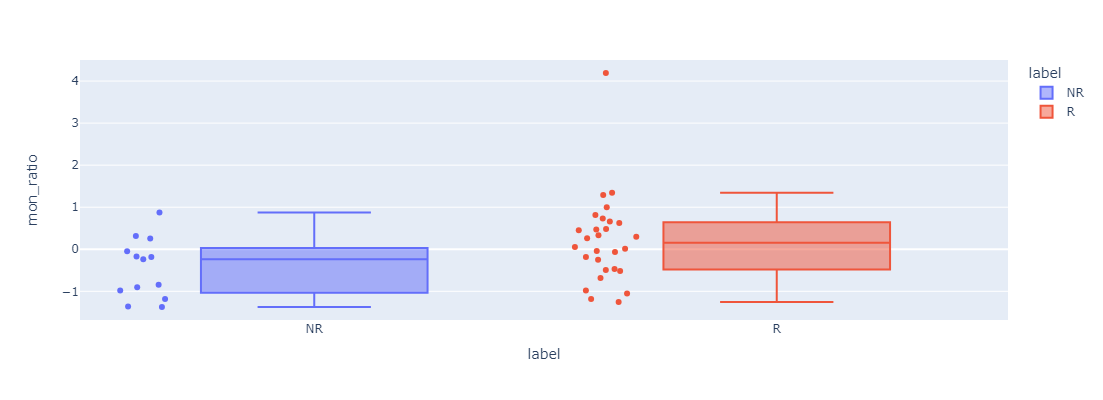

In [118]:
import plotly.express as px
df = X.copy()
df["label"] = y.map({1:"R", 0: "NR"})
fig = px.box(df, x="label", y=mon_ratio_name, color="label", points="all", width=600, height=400, log_y=False)

fig.show()

### view

In [119]:
print(X.shape)
print(X.columns)
X.head()

(41, 28)
Index(['HALLMARK_APICAL_JUNCTION-CD16 Mono', 'HALLMARK_APOPTOSIS-CD16 Mono',
       'HALLMARK_CHOLESTEROL_HOMEOSTASIS-CD16 Mono',
       'HALLMARK_INFLAMMATORY_RESPONSE-CD14 Mono',
       'HALLMARK_INFLAMMATORY_RESPONSE-CD16 Mono',
       'HALLMARK_TNFA_SIGNALING_VIA_NFKB-CD14 Mono',
       'HALLMARK_TNFA_SIGNALING_VIA_NFKB-CD16 Mono', 'B', 'CD4.CM', 'CD4.EM',
       'CD4.Naive', 'CD8.CM', 'CD8.EM', 'CD8.naive', 'Cycling', 'MAIT',
       'NK.bright', 'NK.dim', 'Tregs', 'CD14 Mono', 'CD16 Mono', 'DCs',
       'Inter Mono', 'pDC', 'B_category', 'mon_ratio', 'CD4', 'CD8'],
      dtype='object')


,HALLMARK_APICAL_JUNCTION-CD16 Mono,HALLMARK_APOPTOSIS-CD16 Mono,HALLMARK_CHOLESTEROL_HOMEOSTASIS-CD16 Mono,HALLMARK_INFLAMMATORY_RESPONSE-CD14 Mono,HALLMARK_INFLAMMATORY_RESPONSE-CD16 Mono,HALLMARK_TNFA_SIGNALING_VIA_NFKB-CD14 Mono,HALLMARK_TNFA_SIGNALING_VIA_NFKB-CD16 Mono,B,CD4.CM,CD4.EM,...,Tregs,CD14 Mono,CD16 Mono,DCs,Inter Mono,pDC,B_category,mon_ratio,CD4,CD8
patient,,,,,,,,,,,,,,,,,,,,,
GIL_01,0.090858,0.142722,0.103711,-0.026402,0.125739,-0.001839,0.035825,0.00000,0.03413,0.06143,...,0.02048,0.80223,0.04625,0.03668,0.10207,0.01276,0,-1.358155,0.28583,0.47952
GIL_02,-0.046542,0.016285,0.003678,-0.054138,0.034415,-0.014066,0.009606,0.00053,0.01163,0.03594,...,0.01903,0.75158,0.16737,0.01263,0.06632,0.00211,0,-0.169365,0.22093,0.54335
GIL_03,-0.059306,0.036100,-0.014916,-0.126769,-0.016796,-0.068230,-0.001888,0.00201,0.04025,0.04441,...,0.04927,0.68304,0.14933,0.03468,0.13102,0.00193,0,-0.185573,0.21859,0.60722
GIL_04,-0.013229,0.042234,0.017455,0.044129,0.053433,0.059288,0.025582,0.01039,0.08419,0.05155,...,0.07560,0.49444,0.36111,0.02222,0.12222,0.00000,0,0.875475,0.36426,0.40550
GIL_05,-0.010807,0.004165,-0.009597,-0.072766,0.008753,-0.043784,-0.046632,0.00358,0.01944,0.01080,...,0.00648,0.60175,0.21765,0.03032,0.14960,0.00067,0,0.257303,0.13175,0.35421


## cross validation hp search

In [120]:
from sklearn.model_selection import train_test_split
from clinical_predictions.optuna_optimization import get_best_model_with_optuna

In [121]:
from sklearn.decomposition import PCA

def pca_fit_transform_train_transform_test(X_train, X_test, feats_to_pca, pc_name, n_pcs=3):
    assert all([feat in X_train.columns for feat in feats_to_pca]), ValueError("not all feats in X_train")
    assert all([feat in X_test.columns for feat in feats_to_pca]), ValueError("not all feats in X_test")

    pca = PCA(n_components=n_pcs)
    pca_X_train = pca.fit_transform(X_train[feats_to_pca])
    pca_X_test = pca.transform(X_test[feats_to_pca])

    pc_names = [f"{pc_name}_pc_{i}" for i in range(n_pcs)]
    X_train_transformed = pd.concat([X_train.drop(columns=feats_to_pca), 
                                       pd.DataFrame(pca_X_train, columns=pc_names, index=X_train.index)],
                                      axis=1)
    X_test_transformed = pd.concat([X_test.drop(columns=feats_to_pca), 
                                        pd.DataFrame(pca_X_test, columns=pc_names, index=X_test.index)],
                                    axis=1)
    
    return X_train_transformed, X_test_transformed


In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
if use_mye_pathways:
    X_train, X_test = pca_fit_transform_train_transform_test(X_train, X_test, 
                                                             feats_to_pca=[col for col in X.columns if col in all_feats_names["mye_pathways"]],
                                                             pc_name="mye_pathways")

In [123]:
best_model, best_trail = get_best_model_with_optuna(X_train, y_train, precision_alpha = 0, n_trials=50)

[I 2024-04-16 23:08:13,792] A new study created in memory with name: no-name-7cecb0ab-b60f-438b-b48c-4398cae475f6
[I 2024-04-16 23:08:14,456] Trial 0 finished with value: 0.48347008204008546 and parameters: {'classifier': 'XGBoost', 'xgb_booster': 'gbtree', 'xgb_n_estimators': 2, 'xgb_max_depth': 1}. Best is trial 0 with value: 0.48347008204008546.
[I 2024-04-16 23:08:14,901] Trial 1 finished with value: 0.4212060816727389 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 1, 'rf_n_estimators': 43, 'rf_max_samples': 0.8, 'rf_class_weight': 'balanced_subsample'}. Best is trial 0 with value: 0.48347008204008546.
[I 2024-04-16 23:08:15,168] Trial 2 finished with value: 0.42027843446283164 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 2, 'rf_n_estimators': 23, 'rf_max_samples': 0.8, 'rf_class_weight': 'balanced_subsample'}. Best is trial 0 with value: 0.48347008204008546.
[I 2024-04-16 23:08:15,235] Trial 3 finished with value: 0.5486464110159913 and parameters

In [124]:
print(best_trail.user_attrs["best_booster"])
pd.DataFrame(best_trail.user_attrs["scores"])

LogisticRegression(C=8.246072965563606, class_weight='balanced', penalty='l1',
                   solver='liblinear')


,fit_time,score_time,test_accuracy,test_precision,test_f1,test_f1_weighted,test_f1_macro
0,0.001883,0.006356,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.001815,0.006341,0.888889,0.833333,0.909091,0.886003,0.883117
2,0.001810,0.006343,0.666667,1.000000,0.400000,0.605128,0.584615
3,0.001892,0.006372,0.666667,1.000000,0.727273,0.692641,0.649351
4,0.001820,0.006344,0.666667,0.800000,0.727273,0.675325,0.649351
5,0.001823,0.006531,0.555556,1.000000,0.600000,0.577778,0.550000
6,0.001839,0.006358,0.888889,1.000000,0.933333,0.903704,0.800000
7,0.001934,0.006360,0.777778,0.800000,0.800000,0.777778,0.775000


### LTR - regression 

In [125]:
X_ltr_reg_train, X_ltr_reg_test, y_ltr_reg_train, y_ltr_reg_test = train_test_split(X, y_ltr, test_size=0.3, random_state=42)
if use_mye_pathways:
    X_ltr_reg_train, X_ltr_reg_test = pca_fit_transform_train_transform_test(X_ltr_reg_train, X_ltr_reg_test, 
                                                             feats_to_pca=[col for col in X.columns if col in all_feats_names["mye_pathways"]],
                                                             pc_name="mye_pathways")

In [126]:
best_ltr_reg_model, best_ltr_reg_trail = get_best_model_with_optuna(X_ltr_reg_train, y_ltr_reg_train, n_trials=50, use_regression_score=True)

[I 2024-04-16 23:08:23,864] A new study created in memory with name: no-name-dc3f8f06-9a16-47e7-b5bc-b865886537d8
[I 2024-04-16 23:08:24,023] Trial 0 finished with value: -0.11263168785062715 and parameters: {'regressor': 'RandomForestRegressor', 'rf_max_depth': 2, 'rf_n_estimators': 22}. Best is trial 0 with value: -0.11263168785062715.
[I 2024-04-16 23:08:24,327] Trial 1 finished with value: -0.1661371556308354 and parameters: {'regressor': 'RandomForestRegressor', 'rf_max_depth': 3, 'rf_n_estimators': 48}. Best is trial 0 with value: -0.11263168785062715.
[I 2024-04-16 23:08:24,353] Trial 2 finished with value: -0.2476782398024807 and parameters: {'regressor': 'SVR', 'svc_c': 0.11328586557720231}. Best is trial 0 with value: -0.11263168785062715.
[I 2024-04-16 23:08:24,379] Trial 3 finished with value: -2.57571931955368 and parameters: {'regressor': 'SVR', 'svc_c': 2407.84441720718}. Best is trial 0 with value: -0.11263168785062715.
[I 2024-04-16 23:08:24,654] Trial 4 finished with 

In [127]:
print(best_ltr_reg_model)
pd.DataFrame(best_ltr_reg_trail.user_attrs["scores"])

RandomForestRegressor(max_depth=2, n_estimators=4)


,fit_time,score_time,test_r2
0,0.004217,0.001356,0.332530
1,0.004207,0.001359,-0.516017
2,0.004246,0.001418,-0.062418
3,0.004262,0.001356,0.250285
4,0.004345,0.001355,0.273927
5,0.004253,0.001355,0.099636
6,0.004237,0.001364,-0.312500
7,0.004444,0.001366,0.011901


In [128]:
best_ltr_reg_model.fit(X_ltr_reg_train, y_ltr_reg_train)
y_ltr_reg_train_pred = best_ltr_reg_model.predict(X_ltr_reg_train)
train_results_df = pd.concat([
    y_ltr_reg_train.rename("train"),
    pd.Series(y_ltr_reg_train_pred, index=y_ltr_reg_train.index).rename("pred"),
    (y_ltr_reg_train - y_ltr_reg_train_pred).abs().rename("abs_diff")
], axis=1)
# train_results_df
fig = px.scatter(train_results_df.reset_index(), x="train", y= "pred", color="abs_diff", hover_data=['patient'])
fig.show()

### LTR - classification


In [129]:
long_term_policy = "ltr_vs_other_response" 
if long_term_policy == "ltr_vs_rest":
    y_ltr_classification = (y_ltr == 1).astype(int)
    X_ltr = X.loc[y_ltr_classification.index]
elif long_term_policy == "ltr_vs_other_response":
    y_ltr_classification = (y_ltr[y_ltr != 0] == 1).astype(int)
    X_ltr = X.loc[y_ltr_classification.index]
else:
    raise ValueError("long_term_policy not alowed")

In [130]:
X_ltr_train, X_ltr_test, y_ltr_train, y_ltr_test = train_test_split(X_ltr, y_ltr_classification, test_size=0.3, random_state=42, stratify=y_ltr_classification)
if use_mye_pathways:
    X_ltr_train, X_ltr_test = pca_fit_transform_train_transform_test(X_ltr_train, X_ltr_test, 
                                                             feats_to_pca=[col for col in X.columns if col in all_feats_names["mye_pathways"]],
                                                             pc_name="mye_pathways")

In [131]:
best_ltr_model, best_ltr_trail = get_best_model_with_optuna(X_ltr_train, y_ltr_train, precision_alpha = 0, n_trials=5)

[I 2024-04-16 23:08:30,513] A new study created in memory with name: no-name-2d7b484e-33dd-497b-830f-853948d8d31b
/home/labs/amit/noamsh/.conda/envs/CLL_2024/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

[I 2024-04-16 23:08:30,980] Trial 0 finished with value: 0.3525455178012292 and parameters: {'classifier': 'XGBoost', 'xgb_booster': 'dart', 'xgb_n_estimators': 16, 'xgb_max_depth': 3}. Best is trial 0 with value: 0.3525455178012292.
/home/labs/amit/noamsh/.conda/envs/CLL_2024/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/home/labs/amit/noamsh/.conda/envs/CLL_2024/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471:

In [132]:
print(best_ltr_trail.user_attrs["best_booster"])
pd.DataFrame(best_ltr_trail.user_attrs["scores"])

LogisticRegression(C=0.04368719560380166, solver='liblinear')


,fit_time,score_time,test_accuracy,test_precision,test_f1,test_f1_weighted,test_f1_macro
0,0.001966,0.006131,0.666667,0.666667,0.800000,0.533333,0.400000
1,0.001523,0.005902,0.833333,0.833333,0.909091,0.757576,0.454545
2,0.001513,0.005844,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.001504,0.005903,0.666667,0.666667,0.800000,0.533333,0.400000
4,0.001556,0.006189,0.833333,1.000000,0.909091,0.909091,0.454545
5,0.001571,0.006134,0.500000,0.500000,0.666667,0.333333,0.333333
6,0.001591,0.006112,0.500000,0.500000,0.666667,0.333333,0.333333
7,0.001524,0.005921,0.500000,0.500000,0.666667,0.333333,0.333333


## evaluation - on train set

#### prep

In [133]:
from evaluation.visualizations import plot_ROC_PRauc_CM_stem

In [134]:
def predict_train_test(model, X_1, X_2):
    y_train_pred = model.predict(X_1)
    y_train_proba = model.predict_proba(X_1)[:,1]
    y_test_pred = model.predict(X_2)
    y_test_proba = model.predict_proba(X_2)[:,1]
    return y_train_pred, y_train_proba, y_test_pred, y_test_proba

from sklearn.base import clone
    
def predict_using_all_other(model, X, y, return_trained_models=False, use_pca_of_feats=None, pc_name="feature"):
    
    y_pred_proba = {}
    y_pred = {}
    trained_models_dict = {}
    for pid in y.index:
        _model = clone(model)
        X_train = X.drop(pid)
        y_train = y.drop(pid)

        X_pred = X.loc[pid]
        X_pred = pd.DataFrame(X_pred).T
        
        if not use_pca_of_feats is None:
            X_train, X_pred = pca_fit_transform_train_transform_test(X_train, X_pred, feats_to_pca=use_pca_of_feats, pc_name=pc_name)
        _model.fit(X_train, y_train)
        
        pred = _model.predict(X_pred)[0]
        proba_ref = _model.predict_proba(X_pred)[0][1]
        y_pred[pid] = pred
        y_pred_proba[pid] = proba_ref
        trained_models_dict[pid] = _model
    
    y_proba_pred = pd.Series(y_pred_proba)
    y_pred = pd.Series(y_pred)
    if return_trained_models:
        return y_pred, y_proba_pred, trained_models_dict
    return y_pred, y_proba_pred
    # y_proba_pred.hist()

### response

In [135]:
best_model

LogisticRegression(C=8.246072965563606, class_weight='balanced', penalty='l1',
                   solver='liblinear')

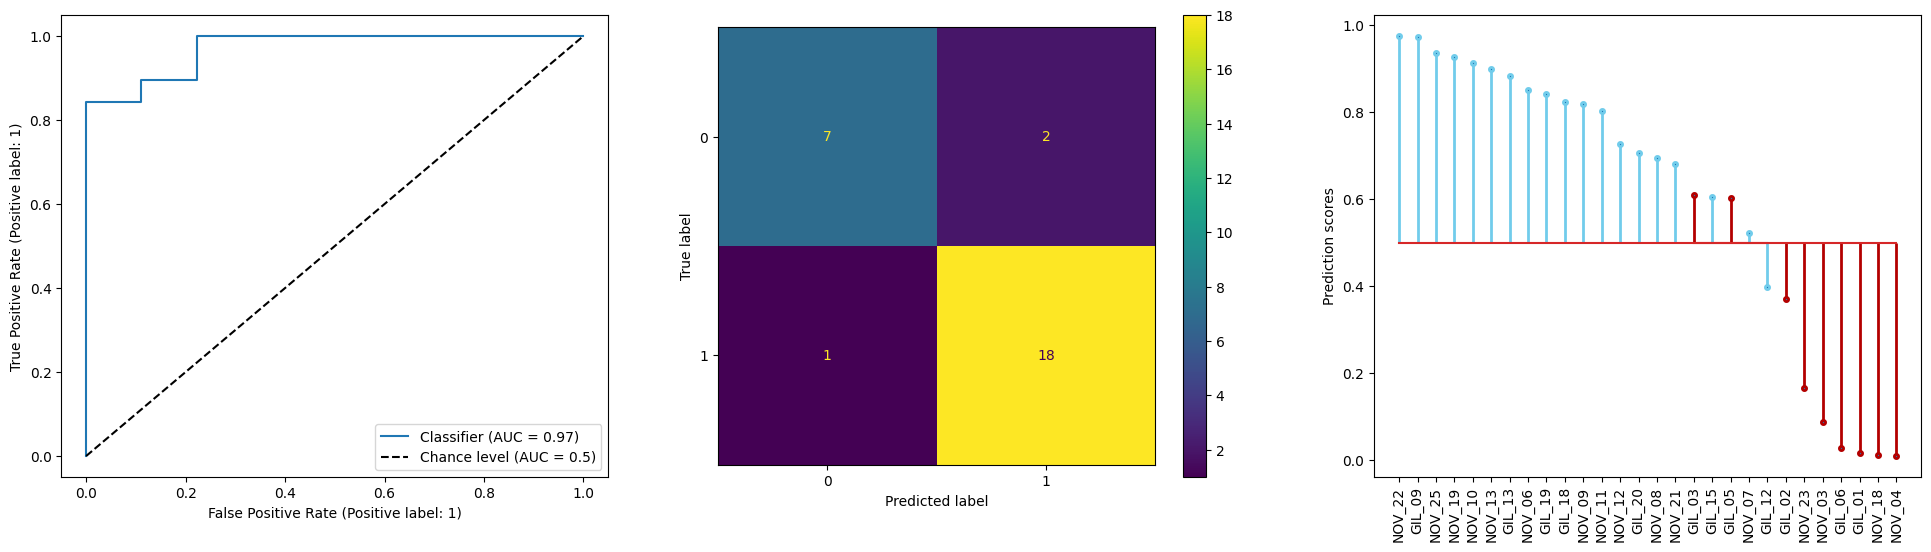

In [136]:
best_model.fit(X_train, y_train)
y_train_pred, y_train_proba, y_test_pred, y_test_proba = predict_train_test(best_model, X_train, X_test)
plot_ROC_PRauc_CM_stem(y_train, y_train_pred, y_train_proba, pos_label=1)

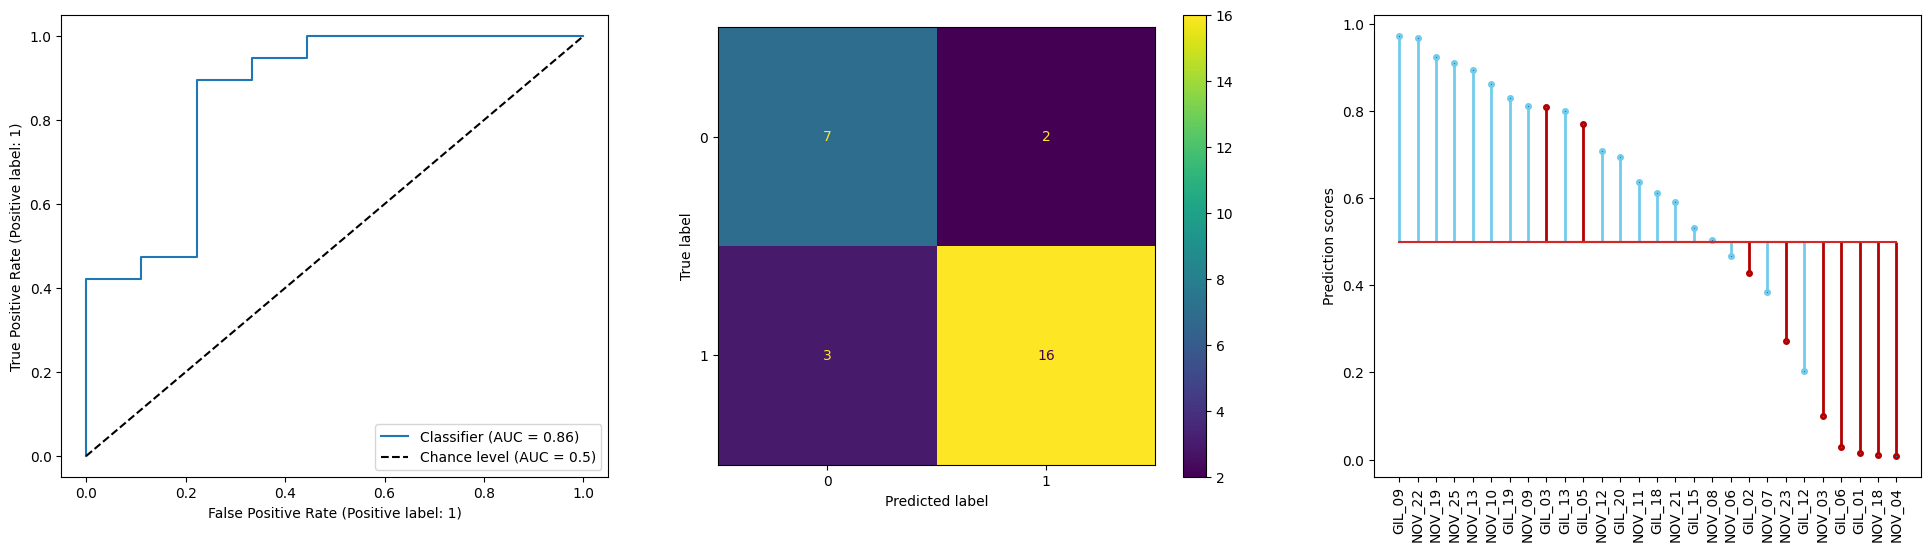

In [137]:
y_train_pred, y_train_proba, models_dict= predict_using_all_other(best_model, X_train, y_train, return_trained_models=True)
plot_ROC_PRauc_CM_stem(y_train, y_train_pred, y_train_proba, pos_label=best_model.classes_[1])

In [138]:
df = "NONE"
num_highest = 3
try:
    bad_patients = y_train_proba[y_train==0].sort_values().iloc[-num_highest:]
    good_patient = y_train_proba[y_train==1].sort_values().iloc[-num_highest:]
    assert all(y[bad_patients.index] == 0)
    assert all(y[good_patient.index] == 1)
    df = pd.concat([X.loc[bad_patients.index], X.loc[good_patient.index]])
except:
    print("ERROR")
df

,HALLMARK_APICAL_JUNCTION-CD16 Mono,HALLMARK_APOPTOSIS-CD16 Mono,HALLMARK_CHOLESTEROL_HOMEOSTASIS-CD16 Mono,HALLMARK_INFLAMMATORY_RESPONSE-CD14 Mono,HALLMARK_INFLAMMATORY_RESPONSE-CD16 Mono,HALLMARK_TNFA_SIGNALING_VIA_NFKB-CD14 Mono,HALLMARK_TNFA_SIGNALING_VIA_NFKB-CD16 Mono,B,CD4.CM,CD4.EM,...,Tregs,CD14 Mono,CD16 Mono,DCs,Inter Mono,pDC,B_category,mon_ratio,CD4,CD8
GIL_02,-0.046542,0.016285,0.003678,-0.054138,0.034415,-0.014066,0.009606,0.00053,0.01163,0.03594,...,0.01903,0.75158,0.16737,0.01263,0.06632,0.00211,0,-0.169365,0.22093,0.54335
GIL_05,-0.010807,0.004165,-0.009597,-0.072766,0.008753,-0.043784,-0.046632,0.00358,0.01944,0.01080,...,0.00648,0.60175,0.21765,0.03032,0.14960,0.00067,0,0.257303,0.13175,0.35421
GIL_03,-0.059306,0.036100,-0.014916,-0.126769,-0.016796,-0.068230,-0.001888,0.00201,0.04025,0.04441,...,0.04927,0.68304,0.14933,0.03468,0.13102,0.00193,0,-0.185573,0.21859,0.60722
NOV_19,-0.068153,-0.023803,-0.097385,-0.088296,-0.029656,-0.053522,-0.052838,0.00289,0.04939,0.05126,...,0.03355,0.31748,0.39571,0.09969,0.12270,0.06442,0,1.345682,0.27866,0.48649
NOV_22,-0.075554,0.025498,0.023770,-0.123033,-0.062812,0.084723,-0.085743,0.09268,0.11820,0.48367,...,0.07154,0.02970,0.94059,0.00000,0.02970,0.00000,-1,4.191585,0.80249,0.08398
GIL_09,-0.091268,-0.058722,-0.055841,-0.081618,-0.084072,-0.039530,-0.089062,0.00000,0.08322,0.08886,...,0.02116,0.37302,0.25397,0.23016,0.11905,0.02381,0,0.813745,0.52187,0.34273


In [139]:
try:
    plot_df = X.copy()
    plot_df["y_pred"] = y_train_proba
    plot_df["y_true"] = y
    # featurs = "HALLMARK_TNFA_SIGNALING_VIA_NFKB-CD16 Mono", "HALLMARK_INFLAMMATORY_RESPONSE-CD16 Mono", # "HALLMARK_APICAL_JUNCTION-CD16 Mono",
    fig = px.scatter(plot_df.reset_index(), x="HALLMARK_TNFA_SIGNALING_VIA_NFKB-CD16 Mono",
                     y= "CD16 Mono", 
                     color="y_pred",
                     # size='petal_length',
                     hover_data=['patient', "y_pred", "B", "y_true"]
                    )
    fig.show()
except ValueError:
    pass

### LTR- reg

In [140]:
best_ltr_reg_model.fit(X_ltr_reg_train, y_ltr_reg_train)
y_ltr_reg_train_pred = best_ltr_reg_model.predict(X_ltr_reg_train)
train_results_df = pd.concat([
    y_ltr_reg_train.rename("train"),
    pd.Series(y_ltr_reg_train_pred, index=y_ltr_reg_train.index).rename("pred"),
    (y_ltr_reg_train - y_ltr_reg_train_pred).abs().rename("abs_diff")
], axis=1)
# train_results_df


In [141]:
fig = px.scatter(train_results_df.reset_index(), x="train", y= "pred", color="abs_diff", hover_data=['patient'])
fig.show()

### LTR

In [142]:
best_ltr_model

LogisticRegression(C=0.04368719560380166, solver='liblinear')

In [143]:
best_ltr_model.fit(X_ltr_train, y_ltr_train)
y_ltr_train_pred, y_ltr_train_proba, y_ltr_test_pred, y_ltr_test_proba = predict_train_test(best_ltr_model, X_ltr_train, X_ltr_test)

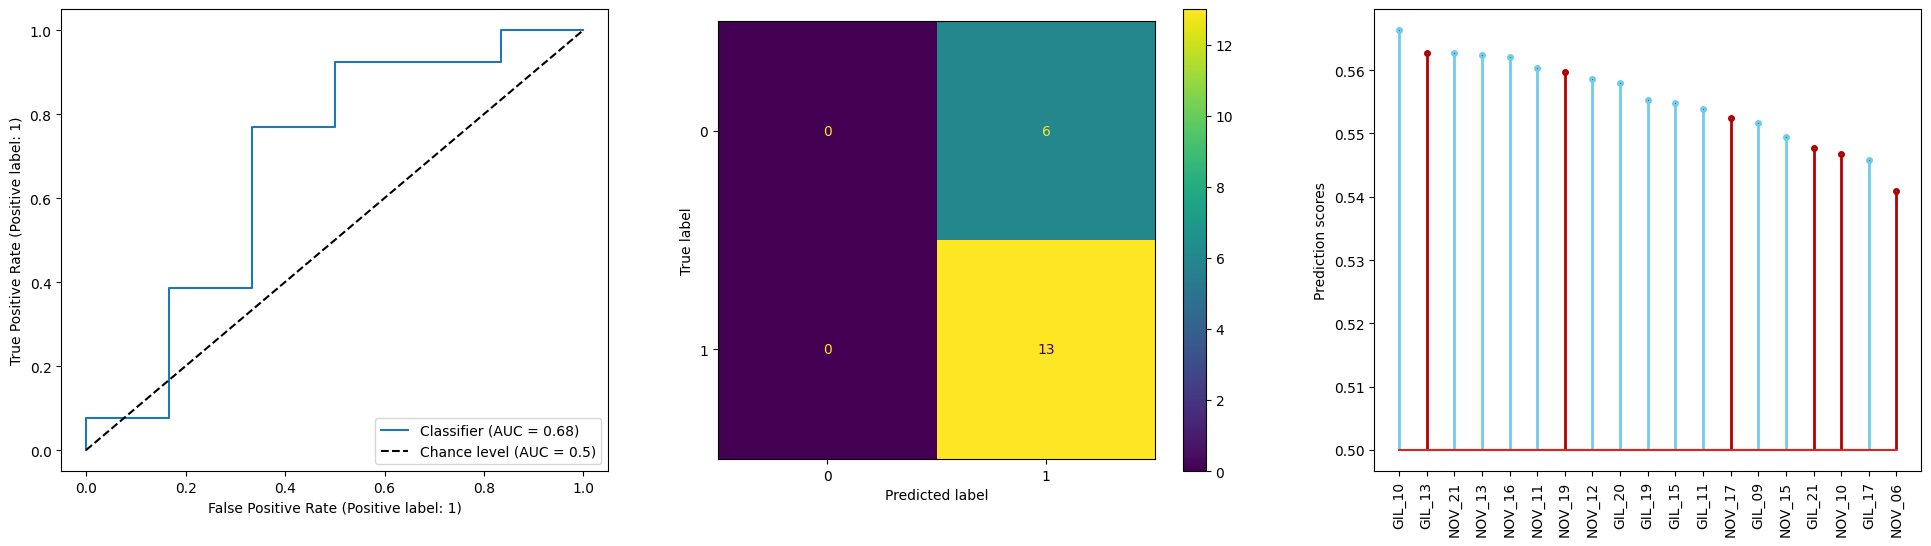

In [144]:
plot_ROC_PRauc_CM_stem(y_ltr_train, y_ltr_train_pred, y_ltr_train_proba, pos_label=best_ltr_model.classes_[1])

## explainability and error analisys

In [145]:
import shap

def print_shap_plots(model, X):
    try: # tree
        explainer = shap.TreeExplainer(model)
    except:
        try: # kernel
            explainer = shap.Explainer(model, X) 
        except:
            explainer = shap.KernelExplainer(model.predict, X)
    shap_values = explainer(X)
    if len(shap_values.shape) >2:
        shap_values = shap_values[:,:,1]
    shap.plots.beeswarm(shap_values)
    shap.plots.bar(shap_values, max_display=5)
    return shap_values


### response

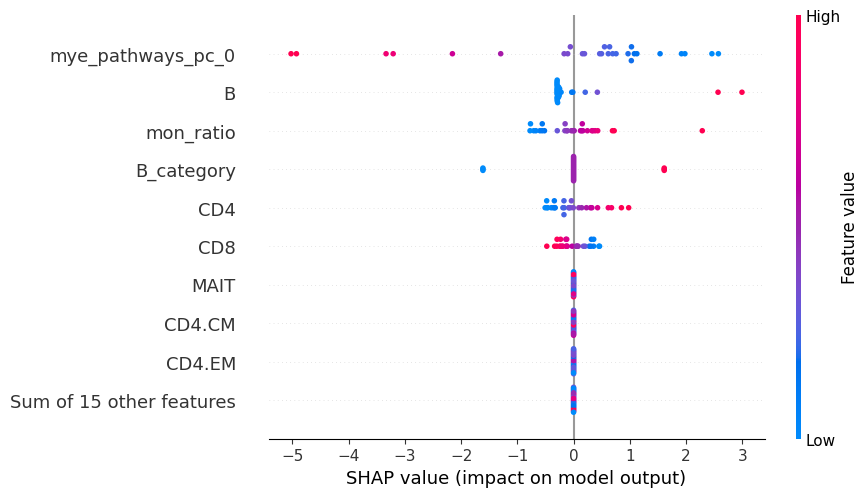

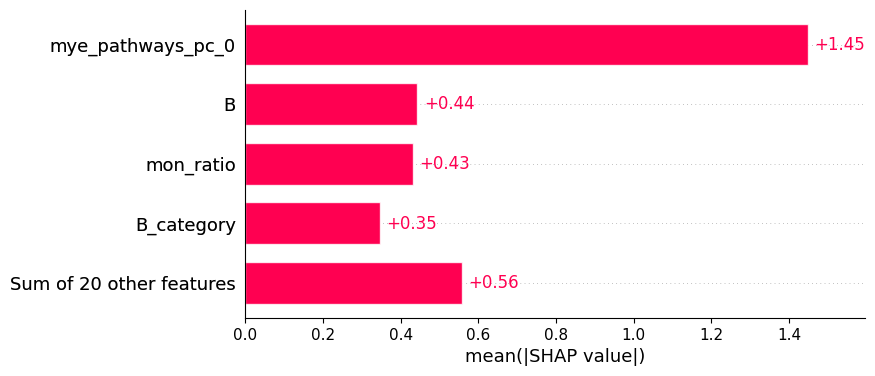

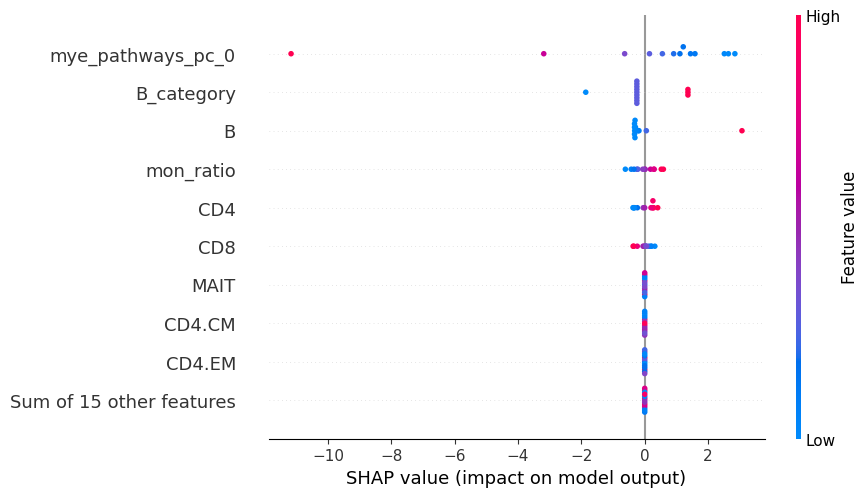

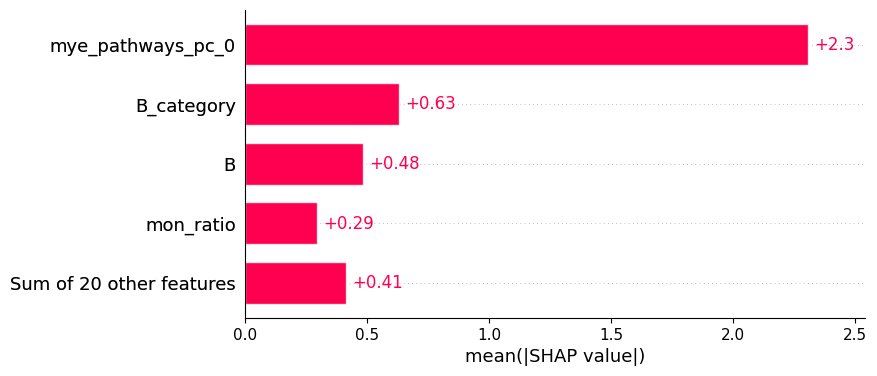

In [146]:
_ = print_shap_plots(best_model, X_train)
_ = print_shap_plots(best_model, X_test)

In [147]:
# patient_ind = bad_patients.index[-1]
# print(patient_ind)
# model_of_false_pos = models_dict[patient_ind]
# all_shap_Values = print_shap_plots(model_of_false_pos, X_train)


In [148]:
# print(patient_ind)
# all_shap_Values = print_shap_plots(model_of_false_pos, X_train.loc[[patient_ind]])
# explainer = shap.TreeExplainer(model_of_false_pos)
# shap.initjs()
# shap.plots.force(explainer.expected_value[1], all_shap_Values[...,1], X_train.loc[patient_ind])

### ltr

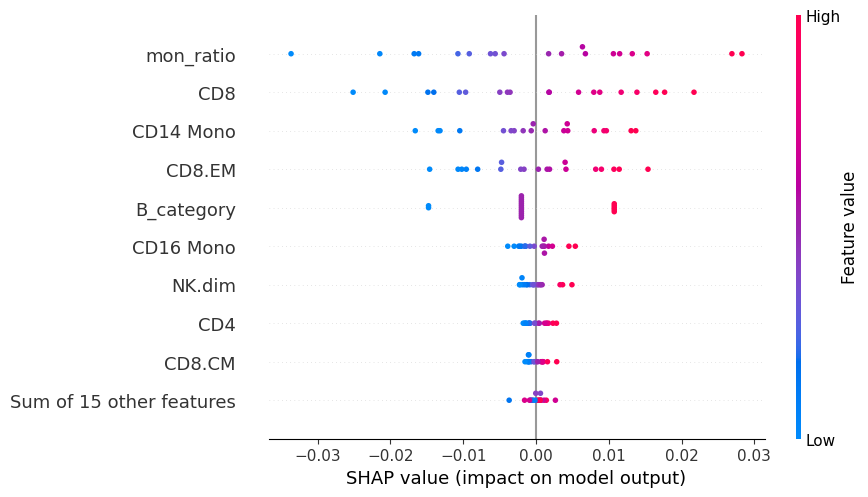

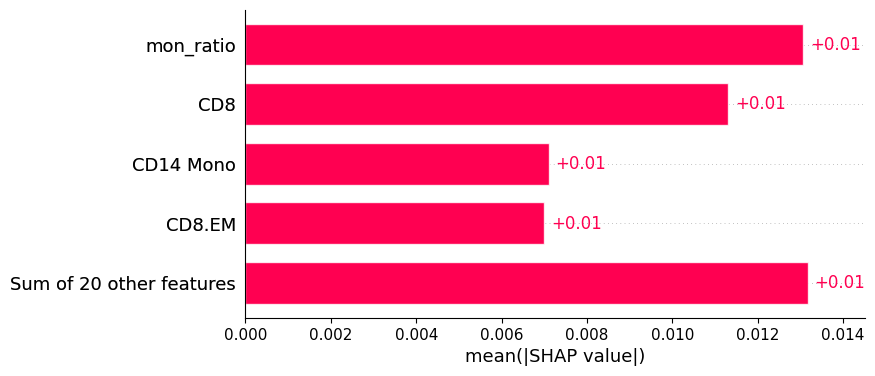

In [149]:
_ = print_shap_plots(best_ltr_model, X_ltr_train)

## test

In [150]:
import numpy as np
from sklearn import metrics
def print_metrics(y_true, y_score):
    report = metrics.classification_report(y_true, y_score, output_dict=True)
    print_report = {
        "R precision": round(report['1']['precision'], 3),
        "NR precision": round(report['0']['precision'], 3),
        'accuracy': round(report['accuracy'],3)
    }
    print_repors_list = [f"{k}: {v}" for k,v in print_report.items()]
    print("\n".join(print_repors_list))

R precision: 1.0
NR precision: 0.667
accuracy: 0.846


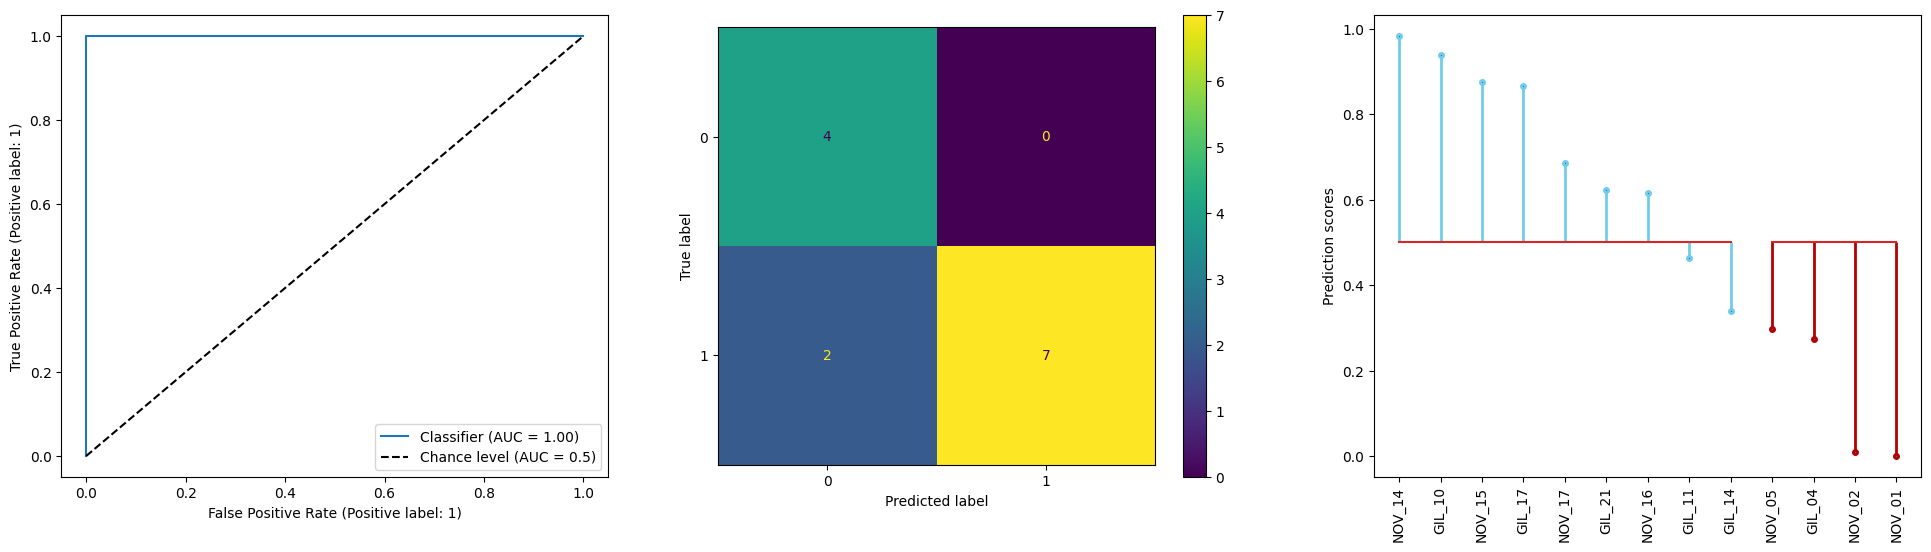

In [151]:
print_metrics(y_test, y_test_pred)
plot_ROC_PRauc_CM_stem(y_test, y_test_pred, y_test_proba, pos_label=best_model.classes_[1])

R precision: 0.926
NR precision: 0.786
accuracy: 0.878


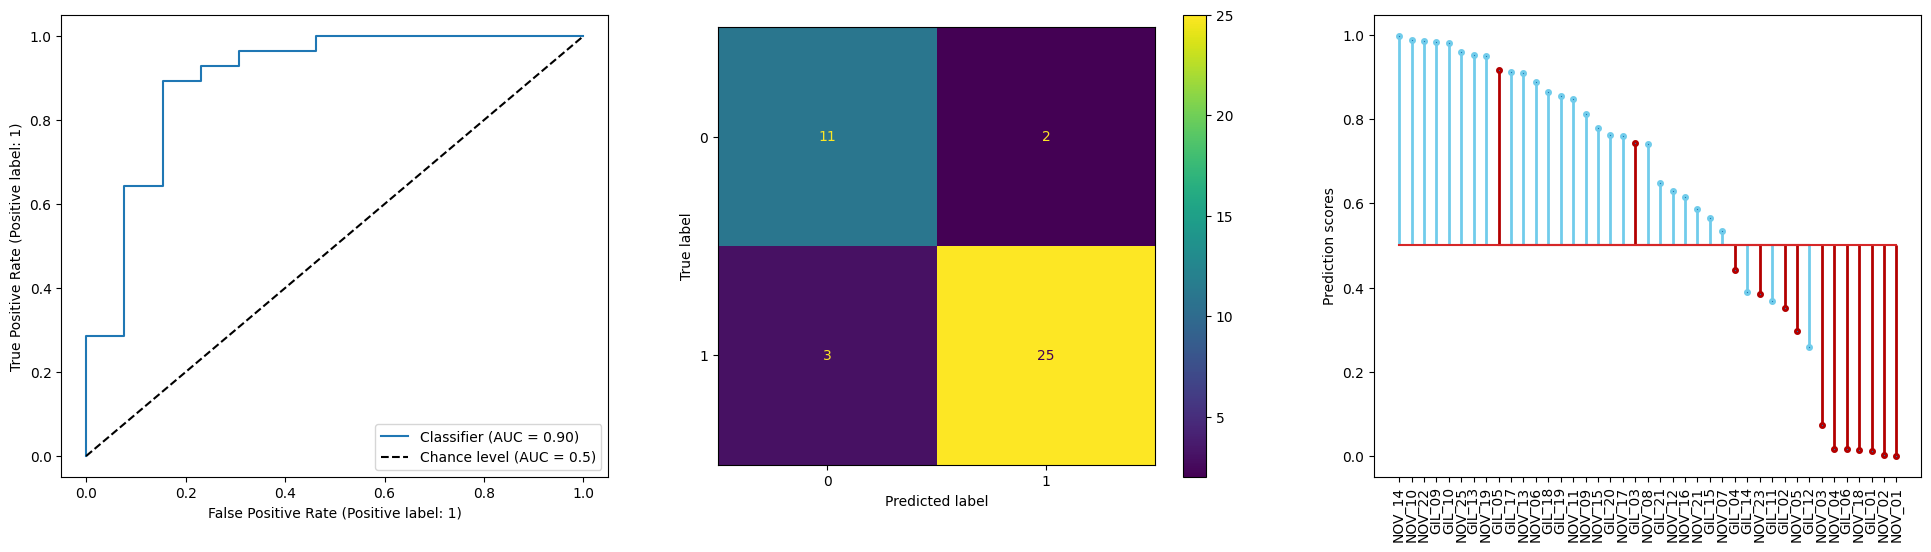

In [152]:
if use_mye_pathways:
    pca_feats = [col for col in X.columns if col in all_feats_names["mye_pathways"]] 
else:
    pca_feats = None
    
y_pred, y_proba = predict_using_all_other(best_model, X, y, use_pca_of_feats=pca_feats, pc_name="mye_pathways")
print_metrics(y, y_pred)
plot_ROC_PRauc_CM_stem(y, y_pred, y_proba, pos_label=best_model.classes_[1])

In [153]:
df = "NONE"
num_highest = 3
try:
    bad_patients = y_proba[y==0].sort_values().iloc[-num_highest:]
    good_patient = y_proba[y==1].sort_values().iloc[-num_highest:]
    assert all(y[bad_patients.index] == 0)
    assert all(y[good_patient.index] == 1)
    df = pd.concat([X.loc[bad_patients.index], X.loc[good_patient.index]])
except:
    print("ERROR")
df

,HALLMARK_APICAL_JUNCTION-CD16 Mono,HALLMARK_APOPTOSIS-CD16 Mono,HALLMARK_CHOLESTEROL_HOMEOSTASIS-CD16 Mono,HALLMARK_INFLAMMATORY_RESPONSE-CD14 Mono,HALLMARK_INFLAMMATORY_RESPONSE-CD16 Mono,HALLMARK_TNFA_SIGNALING_VIA_NFKB-CD14 Mono,HALLMARK_TNFA_SIGNALING_VIA_NFKB-CD16 Mono,B,CD4.CM,CD4.EM,...,Tregs,CD14 Mono,CD16 Mono,DCs,Inter Mono,pDC,B_category,mon_ratio,CD4,CD8
GIL_04,-0.013229,0.042234,0.017455,0.044129,0.053433,0.059288,0.025582,0.01039,0.08419,0.05155,...,0.07560,0.49444,0.36111,0.02222,0.12222,0.00000,0,0.875475,0.36426,0.40550
GIL_03,-0.059306,0.036100,-0.014916,-0.126769,-0.016796,-0.068230,-0.001888,0.00201,0.04025,0.04441,...,0.04927,0.68304,0.14933,0.03468,0.13102,0.00193,0,-0.185573,0.21859,0.60722
GIL_05,-0.010807,0.004165,-0.009597,-0.072766,0.008753,-0.043784,-0.046632,0.00358,0.01944,0.01080,...,0.00648,0.60175,0.21765,0.03032,0.14960,0.00067,0,0.257303,0.13175,0.35421
NOV_22,-0.075554,0.025498,0.023770,-0.123033,-0.062812,0.084723,-0.085743,0.09268,0.11820,0.48367,...,0.07154,0.02970,0.94059,0.00000,0.02970,0.00000,-1,4.191585,0.80249,0.08398
NOV_10,-0.060564,0.007368,-0.012679,-0.079810,0.023547,-0.060082,-0.005360,0.00524,0.02041,0.07526,...,0.09311,0.65107,0.13267,0.06825,0.14647,0.00153,1,-0.247466,0.20919,0.14924
NOV_14,-0.077877,-0.032165,-0.007685,-0.059263,-0.043350,-0.023954,-0.064955,0.02587,0.04173,0.04869,...,0.05671,0.37129,0.31188,0.14851,0.13861,0.02970,1,0.998526,0.39593,0.38202


### ltr-reg

In [154]:

y_ltr_reg_test_pred = best_ltr_reg_model.predict(X_ltr_reg_test)
test_results_df = pd.concat([
    y_ltr_reg_test.rename("label"),
    pd.Series(y_ltr_reg_test_pred, index=y_ltr_reg_test.index).rename("pred"),
    (y_ltr_reg_test - y_ltr_reg_test_pred).abs().rename("abs_diff")
], axis=1)

fig = px.scatter(test_results_df.reset_index(), x="label", y= "pred", color="abs_diff", hover_data=['patient'], width=400, height=400)
fig.update_traces(marker=dict(size=15))
fig.show()

### ltr - classification

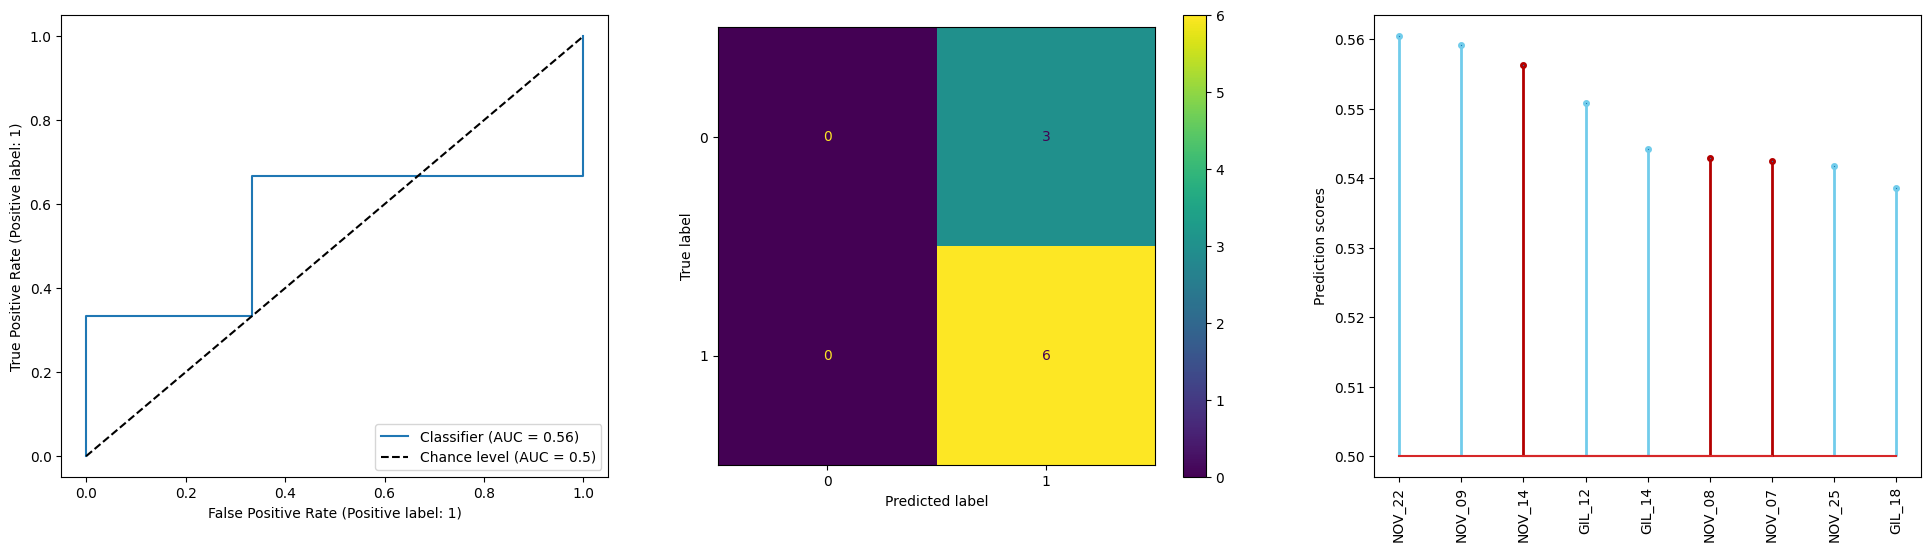

In [155]:
plot_ROC_PRauc_CM_stem(y_ltr_test, y_ltr_test_pred, y_ltr_test_proba, pos_label=best_ltr_model.classes_[1])

In [156]:
## WIP: need to fix LOOCV for LTR classification
# y_ltr_pred, y_ltr_proba = predict_using_all_other(best_ltr_model, X, y_ltr_classification)
# # plot_ROC_PRauc_CM_stem(y, y_pred, y_proba, pos_label=best_model.classes_[1])
# plot_ROC_PRauc_CM_stem(y_ltr, y_ltr_pred, y_ltr_proba, pos_label=best_ltr_model.classes_[1])

## hard test - external validation

In [157]:
haradvala_cell_freq = pd.read_csv(Path(data_dir_path, 'haradvala_cell_type_abundance_by_response_complete_renamed.csv'))
haradvala_cell_freq = haradvala_cell_freq.set_index('sample_id')

haradvala_metadata = haradvala_cell_freq[['Product']]
haradvala_cell_freq = haradvala_cell_freq.drop(columns='Product')

class_map = {"R":1, "NR":0}
y_hard_test = haradvala_cell_freq["response"].map(class_map)
y_hard_test.index = y_hard_test.index.rename("patient")
haradvala_cell_freq = haradvala_cell_freq.drop(columns="response")

haradvala_cell_freq.shape

(20, 16)

In [159]:
add_cell_freq_features(haradvala_cell_freq)

In [160]:
haradvala_cell_freq.head()

,B,CD4.EM,CD4.Naive,CD8.CM,CD8.EM,CD8.naive,Cycling,DCs,GD,CD14 Mono,CD16 Mono,Inter Mono,NK.bright,NK.dim,Tregs,pDC,mon_ratio,CD4,CD8
sample_id,,,,,,,,,,,,,,,,,,,
Patient10-Baseline,0.00116,0.01906,0.03481,0.06797,0.28844,0.02031,0.01243,0.06158,0.21177,0.54239,0.23534,0.14973,0.06216,0.26813,0.01492,0.01097,0.819112,0.05387,0.37672
Patient11-Baseline,0.05611,0.02823,0.07177,0.06029,0.37847,0.05502,0.02392,0.05119,0.08804,0.56256,0.16391,0.18407,0.03923,0.24833,0.00670,0.03826,0.480224,0.10000,0.49378
Patient12-Baseline,0.08068,0.15756,0.21360,0.06109,0.01562,0.47405,0.01102,0.22963,0.00184,0.54074,0.01481,0.12593,0.00735,0.00276,0.05512,0.08889,-1.531911,0.37116,0.55076
Patient13-Baseline,0.00015,0.02715,0.05674,0.08180,0.53498,0.05117,0.03829,0.06704,0.06892,0.51827,0.19586,0.21205,0.01218,0.12113,0.00766,0.00678,0.701554,0.08389,0.66795
Patient14-Baseline,0.00232,0.15198,0.14711,0.05957,0.01945,0.45228,0.03465,0.17626,0.00608,0.66187,0.05396,0.09113,0.02675,0.03647,0.06565,0.01679,-0.603639,0.29909,0.53130


In [161]:

X_hard_test_transformed = haradvala_cell_freq

common_feats = list(set(X).intersection(set(X_hard_test_transformed)))
                    
X_trasnformed = X[common_feats]
X_hard_test_transformed = X_hard_test_transformed[common_feats]

X_hard_test_transformed.shape


(20, 18)

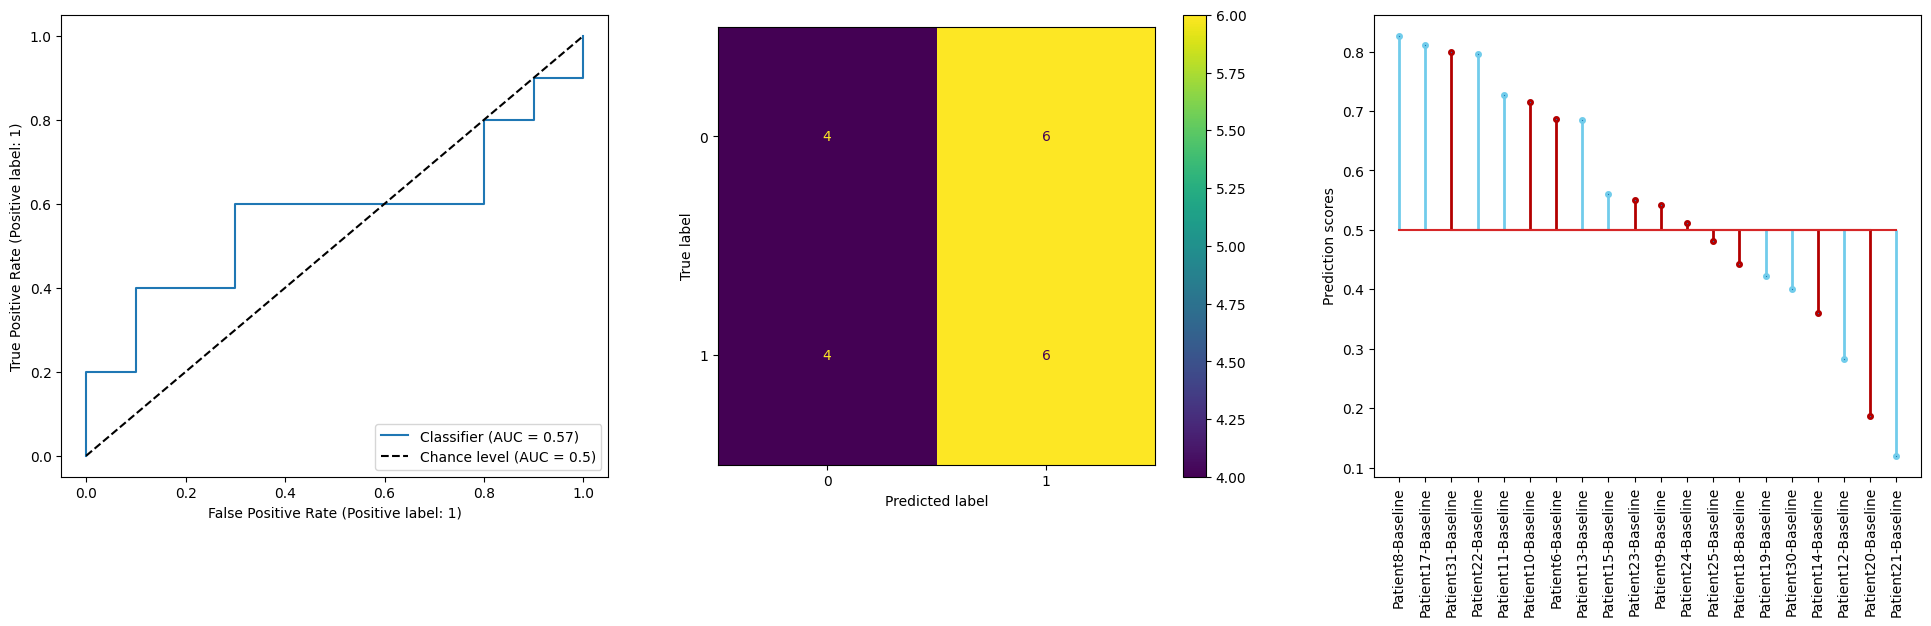

In [162]:
# if use_mye_pathways:
#     X_trasnformed, X_hard_test_transformed = pca_fit_transform_train_transform_test(X, X_hard_test, 
#                                                              feats_to_pca=[col for col in X.columns if col in all_feats_names["mye_pathways"]],
#                                                              pc_name="mye_pathways")
best_model.fit(X_trasnformed,y)
y_hard_test_pred = best_model.predict(X_hard_test_transformed)
y_hard_test_proba = best_model.predict_proba(X_hard_test_transformed)[:,1]
plot_ROC_PRauc_CM_stem(y_hard_test, y_hard_test_pred, y_hard_test_proba)

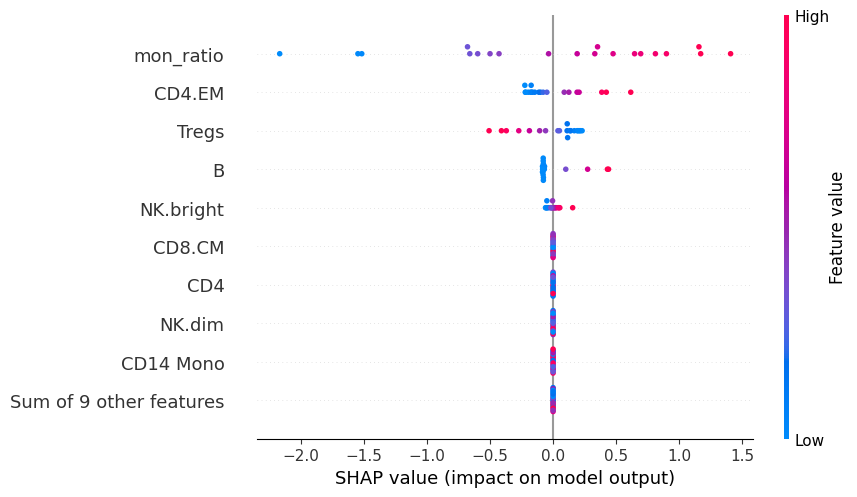

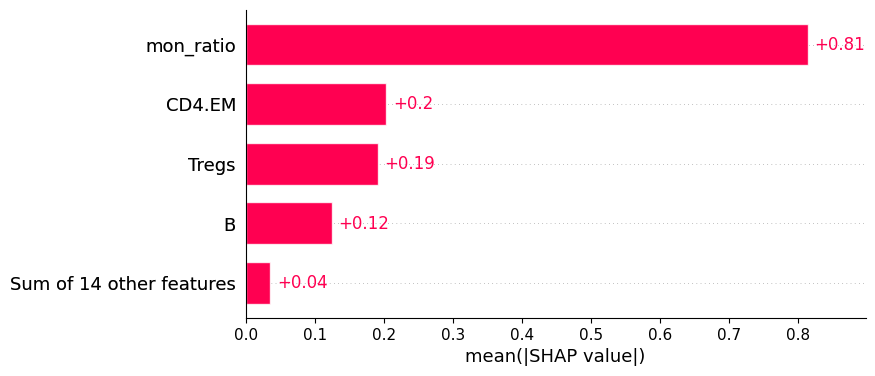

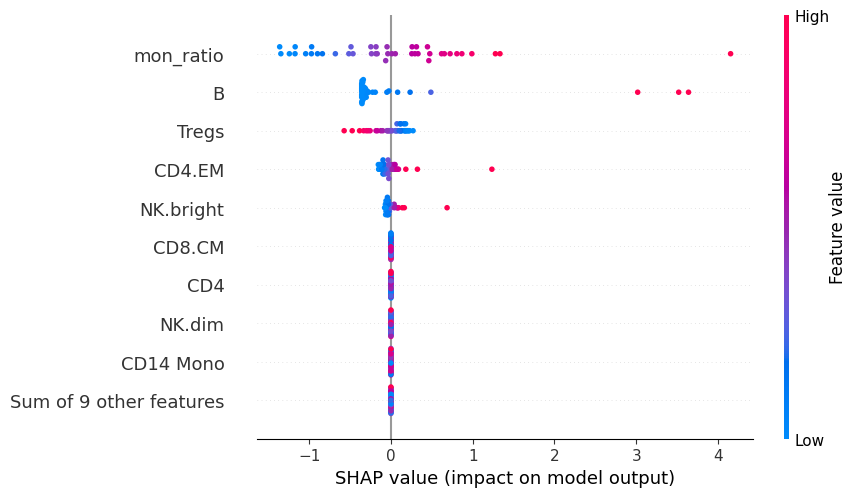

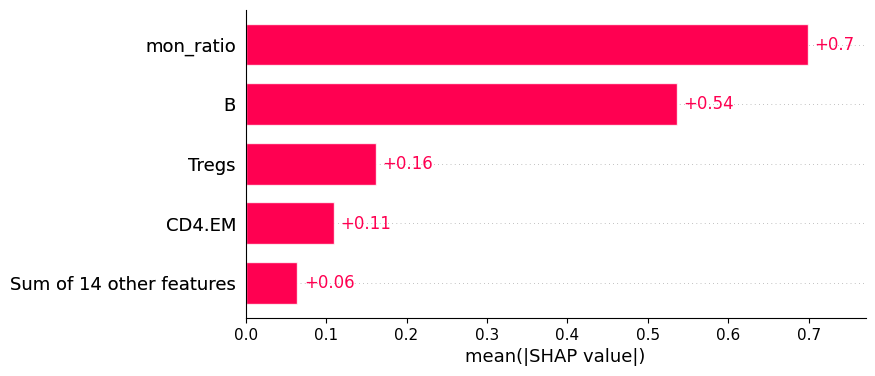

In [163]:
_ = print_shap_plots(best_model, X_hard_test_transformed)
_ = print_shap_plots(best_model, X_trasnformed)


## save all results

In [164]:
def generate_experiment_name(use_cell_frequencies, use_mye_pathways, use_metadata_as_features):
    features_names = []
    if use_cell_frequencies:
        features_names.append('comp')
    if use_mye_pathways:
        features_names.append('mye_pathways')
    if use_metadata_as_features:
        features_names.append('metadata')
    experiment_name = '_'.join(features_names + ['results'])
    return experiment_name

experiment_name = generate_experiment_name(use_cell_frequencies, use_mye_pathways, use_metadata_as_features)
experiment_name

'comp_mye_pathways_results'

In [165]:
all_exp_data = {
    "X": X,
    "y": y,
    'patient_map': patient_map.drop(columns='Unnamed: 0').rename(columns={'sample_id': patient_col}),
    'features': featurs,
    "loocv": {
        'y': y,
        'y_proba': y_proba,
        'y_pred':y_pred
    },
    'test': {
        'y':y_test,
        'y_proba':y_test_proba,
        'y_pred':y_test_pred
    },
    'external_eval': {
        'y': None,
        'y_proba':None,
        'y_pred':None
    }
}

In [166]:
import pickle

In [167]:
# results_path  = Path(data_dir_path, f"{experiment_name}.pkl")
# with open(results_path, 'wb') as handle:
#     pickle.dump(all_exp_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [168]:
# with open(results_path, 'rb') as handle:
#     loaded_results = pickle.load(handle)
# loaded_results.keys()